In [1]:
from PID_control import PID_Controller

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

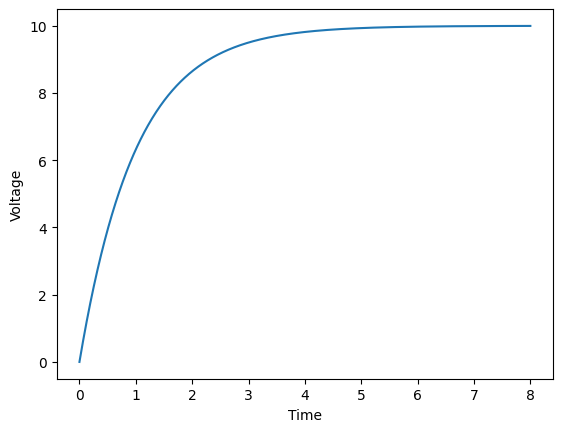

In [2]:
# first order passive low pass filter
def system(Vo, t, Vi):
    C = 1e-3
    R = 1e3
    dVodt = (Vi-Vo)/(R*C)
    return dVodt

tspan = np.linspace(0,8,1000)
Vi = 10,
sol = odeint(system, 0, tspan, args=Vi)
plt.xlabel('Time')
plt.ylabel('Voltage')
plt.plot(tspan,sol)

Text(0, 0.5, 'Voltage')

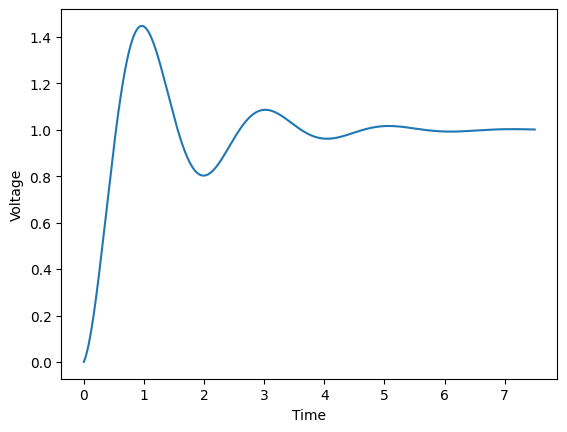

In [7]:
# number of steps
n = 15000
v0 = 0
tp = 0
deltat = 0.0005
v_sol = [v0]
t_sol = [tp]
# Vi is chosen as a manipulated variable
Vi = 0,
controller = PID_Controller(0.6, 10, 0, 1)
for i in range(1, n):
    time = i * deltat
    tspan = np.linspace(tp, time, 10)
    Vi = controller(v_sol[-1], time),
    voi = odeint(system, v_sol[-1], tspan, args = Vi)
    t_sol.append(time)
    v_sol.append(voi[-1][0])
    tp = time
plt.plot(t_sol, v_sol)
plt.xlabel('Time')
plt.ylabel('Voltage')

In [4]:
def system2(t, temp, Tq):
    epsilon = 1
    tau = 4
    Tf = 300
    Q = 2
    dTdt = 1/(tau*(1+epsilon)) * (Tf-temp) + Q/(1+epsilon)*(Tq-temp)
    return dTdt

Text(0, 0.5, 'Temperature')

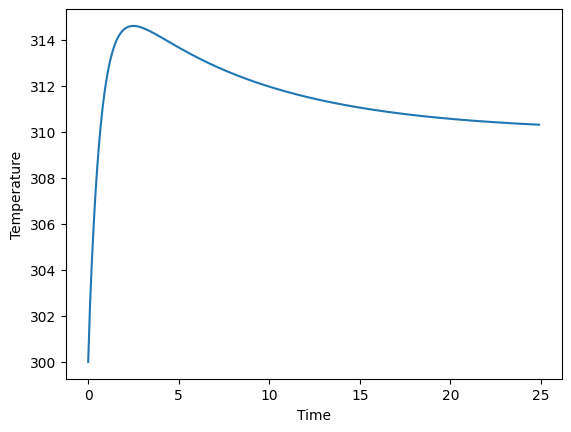

In [5]:
# number of steps
n = 250
y0 = 300
tp = 0
deltat = 0.1
y_sol = [y0]
t_sol = [tp]
# Tq is chosen as a manipulated variable
Tq = 320,
controller = PID_Controller(0.6, 0.2, 0.1, 310, 320)
for i in range(1, n):
    time = i * deltat
    tspan = np.linspace(tp, time, 10)
    Tq = controller(y_sol[-1], time),
    yi = odeint(system2, y_sol[-1], tspan, args = Tq, tfirst=True)
    t_sol.append(time)
    y_sol.append(yi[-1][0])
    tp = time
plt.plot(t_sol, y_sol)
plt.xlabel('Time')
plt.ylabel('Temperature')

In [4]:
import simple_pid
# Verify with external lib

Text(0, 0.5, 'Voltage')

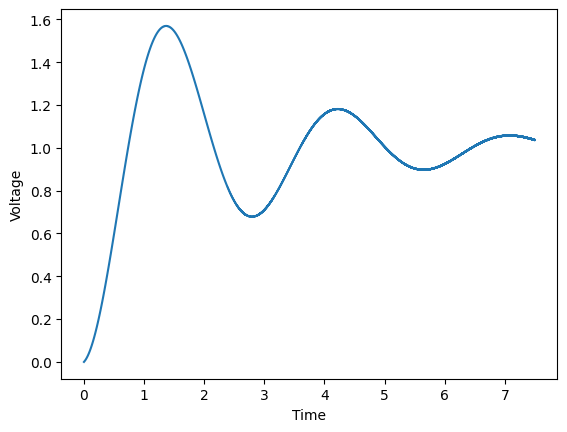

In [14]:
# number of steps
n = 15000
v0 = 0
tp = 0
deltat = 0.0005
v_sol = [v0]
t_sol = [tp]
# Vi is chosen as a manipulated variable
Vi = 0,
controller = simple_pid.PID(0.6, 10, 1, setpoint=1, sample_time=None)
for i in range(1, n):
    time = i * deltat
    tspan = np.linspace(tp, time, 10)
    Vi = controller(v_sol[-1], deltat),
    voi = odeint(system, v_sol[-1], tspan, args = Vi)
    t_sol.append(time)
    v_sol.append(voi[-1][0])
    tp = time
plt.plot(t_sol, v_sol)
plt.xlabel('Time')
plt.ylabel('Voltage')